Implementacion recuperada de:

https://github.com/shivamduseja/Deep-Summarization/blob/master/LSTM_with_attention.ipynb

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3
#dbfile = '/content/drive/MyDrive/NoticiasReforma2009.db'
dbfile='D:/Computo Estadistico/PIA-CD2/NoticiasReforma2009.db' #david pc
import pandas as pd
import sqlite3
import sqlalchemy 

try:
    con = sqlite3.connect(dbfile)    
except Exception as e:
    print(e)



In [ ]:
#Now in order to read in pandas dataframe we need to know table name
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")


df = pd.read_sql_query('SELECT * FROM Noticias2009', con)
con.close()

Table Name : [('Reforma2009',), ('Noticias2009',)]


In [ ]:
df.head()

,fecha,titulo,links,seccion,medio,autor,resumen,articulo
0,01-Ene-2009,Fallan Zunes de Microsoft,https://busquedas.gruporeforma.com/reforma/Doc...,Gadgets,Reforma,AP,Los reproductores de música Zune dejan de func...,\n Fallan reproductores...
1,01-Ene-2009,SAN CADILLA,https://busquedas.gruporeforma.com/reforma/Doc...,editoriales,Reforma,,Se pasan de trabajadores\n \nMientras hoy uste...,\n SAN CADILLASe pasan ...
2,01-Ene-2009,ALEPH CERO / Materia vs. antimateria,https://busquedas.gruporeforma.com/reforma/Doc...,editoriales,Reforma,Shahen Hacyan,"En el Principio eran la luz, la materia y la a...",\n ALEPH CERO / Materia...
3,01-Ene-2009,GACETA DEL ÁNGEL / Yo soy macho donde qu,https://busquedas.gruporeforma.com/reforma/Doc...,editoriales,Reforma,Germán Dehesa,"ANTECEDENTES: el día de ayer, mientras confecc...",\n GACETA DEL ÁNGEL / Y...
4,01-Ene-2009,CIRCUITO INTERIOR,https://busquedas.gruporeforma.com/reforma/Doc...,editoriales,Reforma,,"Unos tristes, otros contentos\n \n \nLOS QUE a...",\n CIRCUITO INTERIORUno...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Preprocesamos las noticias:

In [ ]:
stopSpanish=set(stopwords.words('spanish'))
noticias=[]
for i in range (61035):
  text_tokens = word_tokenize(df['articulo'][i])
  tokens_without_sw = [word for word in text_tokens if not word in stopSpanish]
  tokens_without_sw = [word.lower() for word in tokens_without_sw if word.isalpha()]
  noticias.append(' '.join(tokens_without_sw))

Preprocesamos los resumenes

In [ ]:
stopSpanish=set(stopwords.words('spanish'))
resumen=[]
for i in range (len(df['resumen'])):
  text_tokens = word_tokenize(df['resumen'][i])
  tokens_without_sw = [word for word in text_tokens if not word in stopSpanish]
  tokens_without_sw = [word.lower() for word in tokens_without_sw if word.isalpha()]
  resumen.append(' '.join(tokens_without_sw))

In [ ]:
len(noticias)

61035

In [ ]:
noticias[0]

'fallan reproductores zune microsoft en año nuevo usuarios popular reproductor música zune microsoft pudieron escuchar reproductores zune microsoft respuesta gigante software populares ipod empresa apple dejaron funcionar inesperadamente noche ayer mostraban usuarios mensaje error llevó referencias colapso zunes el problema surgió gente intentó hacer funcionar usuarios buscaron foros ayuda microsoft zune inundaron portal mil empresa sede redmond washington informó problema afectó sólo modelos gigabytes zune provocado problema reloj esperaba problema resuelva tan pronto relojes pasen fecha enero aunque usuarios deberán adoptar varias medidas aparatos funcionen normalmente dejar baterías acaben completo aparatos reinicien falla tantos reproductores mismo tiempo trajo comparaciones problema programación año generó temores crisis generalizada computadoras mundo máquinas avanzaban nuevo reproductores zune populares comparación ipods controla aproximadamente tres cuartas partes mercado repro

In [ ]:
resumen[0]

'los reproductores música zune dejan funcionar noche año nuevo mientras microsoft afirma normalizará enero'

In [ ]:
data={'Noticia': noticias, 'Resumen Original': df['resumen'][:], 'Resumen Procesado': resumen}

In [ ]:
df1=pd.DataFrame(data)
df1.head()

,Noticia,Resumen Original,Resumen Procesado
0,fallan reproductores zune microsoft en año nue...,Los reproductores de música Zune dejan de func...,los reproductores música zune dejan funcionar ...
1,san cadillase pasan trabajadores mientras hoy ...,Se pasan de trabajadores\n \nMientras hoy uste...,se pasan trabajadores mientras hoy usted tempr...
2,aleph cero materia antimateriaen principio luz...,"En el Principio eran la luz, la materia y la a...",en principio luz materia antimateria luego mat...
3,gaceta del ángel yo macho quantecedentes día a...,"ANTECEDENTES: el día de ayer, mientras confecc...",antecedentes día ayer mientras confeccionaba c...
4,circuito interiorunos tristes contentos los qu...,"Unos tristes, otros contentos\n \n \nLOS QUE a...",unos tristes contentos los que andan plano cap...


In [ ]:
df1['Resumen Procesado'][0]

'los reproductores música zune dejan funcionar noche año nuevo mientras microsoft afirma normalizará enero'

In [ ]:
Longitud=[]
for i in df1['Noticia']:
   Longitud.append(len(i.split()))

df1['Longitud Noticia']=Longitud

In [ ]:
Longitud2=[]
for i in df1['Resumen Procesado']:
   Longitud2.append(len(i.split()))

df1['Longitud Resumen']=Longitud2

In [ ]:
df1.head()

,Noticia,Resumen Original,Resumen Procesado,Longitud Noticia,Longitud Resumen
0,fallan reproductores zune microsoft en año nue...,Los reproductores de música Zune dejan de func...,los reproductores música zune dejan funcionar ...,143,14
1,san cadillase pasan trabajadores mientras hoy ...,Se pasan de trabajadores\n \nMientras hoy uste...,se pasan trabajadores mientras hoy usted tempr...,358,15
2,aleph cero materia antimateriaen principio luz...,"En el Principio eran la luz, la materia y la a...",en principio luz materia antimateria luego mat...,340,12
3,gaceta del ángel yo macho quantecedentes día a...,"ANTECEDENTES: el día de ayer, mientras confecc...",antecedentes día ayer mientras confeccionaba c...,363,16
4,circuito interiorunos tristes contentos los qu...,"Unos tristes, otros contentos\n \n \nLOS QUE a...",unos tristes contentos los que andan plano cap...,179,14


array([[<AxesSubplot:title={'center':'Longitud Noticia'}>]], dtype=object)

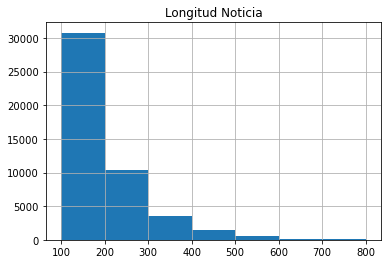

In [ ]:
df1.hist(column='Longitud Noticia', bins= [100,200,300,400,500,600,700,800])

array([[<AxesSubplot:title={'center':'Longitud Resumen'}>]], dtype=object)

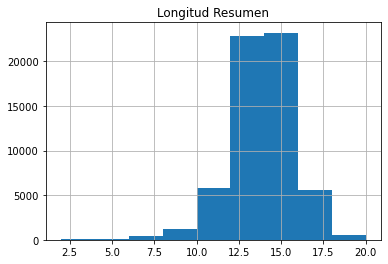

In [ ]:
df1.hist(column='Longitud Resumen', bins= [2,4,6,8,10,12,14,16,18,20])

Observe que las longitudes con mayores incidencias son aquellas con menos de 200 palabras

In [ ]:

cnt=0
for i in df1['Noticia']:
    if(len(i.split())<=200):
        cnt=cnt+1
print(cnt/len(df1['Noticia']))

0.7367248300155649


In [ ]:
Noticiasacotadas=[]
Resumenes=[]

Veo que toman datos con una longitud maxima, no se si sea lo mejor para el corpus

In [ ]:
for i in range(len(df1['Noticia'])):
  if((df1['Longitud Noticia'][i])<=200 and (df1['Longitud Noticia'][i])>=120 and df1['Longitud Resumen'][i]<=15 and df1['Longitud Resumen'][i]>=7):
    Noticiasacotadas.append(df1['Noticia'][i])
    Resumenes.append(df1['Resumen Procesado'][i])

In [ ]:
print(len(Resumenes))
print(len(Noticiasacotadas))

20746
20746


In [ ]:
dfinal=pd.DataFrame({'Noticias': Noticiasacotadas, 'Resumenes': Resumenes})
dfinal.head()

,Noticias,Resumenes
0,fallan reproductores zune microsoft en año nue...,los reproductores música zune dejan funcionar ...
1,circuito interiorunos tristes contentos los qu...,unos tristes contentos los que andan plano cap...
2,la capillamuy movido naucalpan inicio año meno...,muy movido naucalpan inicio año menos departam...
3,el lector escribe la felicidad gran mayoría cu...,a gran mayoría cumplen buenos deseos fechas ac...
4,festeja ezln años levantamientopresencia grupo...,sin presencia subcomandante marcos ezln festej...


In [ ]:
#Generamos datos de pureba y entrenamiento
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dfinal['Noticias'],dfinal['Resumenes'],test_size=0.3,random_state=42,shuffle=True) 

#Creamos un vocabulario/tokens

In [ ]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [ ]:
def readLangs(text, summary, reverse=False):
    print("Reading lines...")
    
    # Split every line into pairs and normalize
    text=np.array(text)
    summary=np.array(summary)
    pairs = [[text[i],summary[i]] for i in range(len(text))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(summary)
        output_lang = Lang(text)
    else:
        input_lang = Lang(text)
        output_lang = Lang(summary)

    return input_lang, output_lang, pairs

In [ ]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name,"--------------------", input_lang.n_words)
    #print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [ ]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)

Reading lines...
Read 14522 sentence pairs
Counting words...
Counted words:
['revisa japón caída pib a pesar revisión alza economía japonesa contrajo primeros meses año ritmo fuerte segunda guerra mundial economistas esperan comience lenta frágil recuperación actual haber sido afectada fuerte caída exportaciones economía cierto alivio medida compañías aumentan lentamente producción efectos paquete estímulo gobierno billones yenes empiezan economía japón contrajo ciento primer trimestre ligeramente debajo estimado previamente estimación mercado promedió declive ciento la revisión técnica cambia panorama general la economía pasado peor etapa probable alcance niveles máximos previos crisis global dijo hiroshi watanabe economista daiwa institute of últimos trimestres economía japonesa acumuló contracción ciento lejos declive ciento usado marca define fabricantes reducido agresivamente inventarios producción industrial japonesa parece tener recuperación forma v menos periodo abril impulsado

In [ ]:
pairs[0]

['revisa japón caída pib a pesar revisión alza economía japonesa contrajo primeros meses año ritmo fuerte segunda guerra mundial economistas esperan comience lenta frágil recuperación actual haber sido afectada fuerte caída exportaciones economía cierto alivio medida compañías aumentan lentamente producción efectos paquete estímulo gobierno billones yenes empiezan economía japón contrajo ciento primer trimestre ligeramente debajo estimado previamente estimación mercado promedió declive ciento la revisión técnica cambia panorama general la economía pasado peor etapa probable alcance niveles máximos previos crisis global dijo hiroshi watanabe economista daiwa institute of últimos trimestres economía japonesa acumuló contracción ciento lejos declive ciento usado marca define fabricantes reducido agresivamente inventarios producción industrial japonesa parece tener recuperación forma v menos periodo abril impulsado economistas proyectar crecimiento ciento segundo trimestre aunque inesperad

In [ ]:
SOS_token = 0
EOS_token = 1

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F




In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device =  torch.device("cpu")
device

device(type='cuda')

Encoder: Lo veremos apenas

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.LSTM(output, hidden)
        return output, hidden

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size, device=device),torch.zeros(1, 1, self.hidden_size, device=device)) 

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
MAX_LENGTH=150

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size*2 , self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size*2 , self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.LSTM = nn.LSTM(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

        #print('Decoder --- atndecoder')

    def forward(self, input, hidden, encoder_outputs):
        #print("inside forward decoder")
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        #print("embedded size", embedded.size())
        #print(embedded[0].size()) #1,300
        #print(hidden[0].size()) # 1, 1, 300
        #print("diff or not")

        #temp = torch.cat((embedded[0], hidden[0]), 1)
        
        #print(temp)
        #print(temp.size())

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden[0][0]), 1)), dim=1)
        #print("after getting attn weights softmax")
        #print(attn_weights.size())
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
#teacher_forcing_ratio = 0.5
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0
    #print('bbbbbbb-->>> input length', input_length)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        #print("priting before error")
        #print(encoder_output.size())
        #print(encoder_outputs.size())
        temp = encoder_output[0, 0]
        #print(temp)
        encoder_outputs[ei] = temp

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    #use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    #Without teacher forcing: use its own predictions as the next input

    #print('aaaaa-->>>')

    for di in range(target_length):
      decoder_output, decoder_hidden, decoder_attention = decoder(
      decoder_input, decoder_hidden, encoder_outputs)


      topv, topi = decoder_output.topk(1)
      
      decoder_input = topi.squeeze().detach()  # detach from history as input
      
      loss += criterion(decoder_output, target_tensor[di])
      
      if decoder_input.item() == EOS_token:
             break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue
      
        loss = train(input_tensor, target_tensor, encoder,decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        #print('cccccc->>>>')

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [ ]:
def evaluateRandomly(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()    
    for i in range(n):
        pair = random.choice(pairs)
        
        if(len(pair[0].split())>=150):
          continue
        else:
          if(i%1000==0):
            print(i*100/n,"% complete")
          
          #print('>', pair[0])
          text.append(pair[0])
          #print('=', pair[1])
          headline.append(pair[1])
          output_words, attentions = evaluate(encoder, decoder, pair[0])
          output_sentence = ' '.join(output_words)
          pred_headline.append(output_sentence)
          #print('<', output_sentence)
          #print('')
    return(text,headline,pred_headline)

Training....
1000 / 15001
2000 / 15001
1m 57s (- 12m 43s) (2000 13%) 3.3518
3000 / 15001
4000 / 15001
5000 / 15001
4m 47s (- 9m 34s) (5000 33%) 4.0264
6000 / 15001
7000 / 15001
6m 44s (- 7m 41s) (7000 46%) 2.8930
8000 / 15001
9000 / 15001
10000 / 15001
9m 43s (- 4m 51s) (10000 66%) 4.6451
11000 / 15001
12000 / 15001
13000 / 15001
14000 / 15001
15000 / 15001
14m 50s (- 0m 0s) (15000 100%) 10.8779


<Figure size 432x288 with 0 Axes>

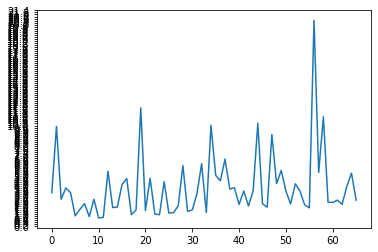

In [ ]:
#Entrenamineto:
hidden_size = 100
encoder2 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder2 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder2, attn_decoder2, 15000, print_every=1000)

In [ ]:
torch.save(encoder2.state_dict(), '/content/drive/MyDrive/encoderbasecorregidp.w')
torch.save(attn_decoder2.state_dict(), '/content/drive/MyDrive/atentionbasecorregido.w')

In [ ]:
text,headline,pred_headline=evaluateRandomly(encoder1, attn_decoder1,15000)

0.0 % complete
6.666666666666667 % complete
40.0 % complete
46.666666666666664 % complete
60.0 % complete
66.66666666666667 % complete
80.0 % complete
86.66666666666667 % complete
93.33333333333333 % complete


In [ ]:
text,headline,pred_headline=evaluateRandomly(encoder2, attn_decoder2,15000)

6.666666666666667 % complete
13.333333333333334 % complete
20.0 % complete
33.333333333333336 % complete
40.0 % complete
46.666666666666664 % complete
53.333333333333336 % complete
73.33333333333333 % complete
86.66666666666667 % complete
93.33333333333333 % complete


In [ ]:
pred_df_LSTM=pd.DataFrame()
pred_df_LSTM['Noticias']=text
pred_df_LSTM['Resumenes']=headline
pred_df_LSTM['ResumenNew']=pred_headline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

pred_df_LSTM.to_csv('/content/drive/My Drive/BaseLSTM.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pred_df_LSTM['ResumenNew'][0]

'el <EOS>'

In [ ]:
evaluateRandomly(encoder2, attn_decoder2,1)

0.0 % complete


(['gana ica contrato pemexla petrolera estatal mexicana pemex dijo martes asignó contrato unidad ica construir planta criogénica monto cercano millones comunicado pemex dijo resultó ganadora propuesta presentada ica fluor daniel linde process construcción planta poza rica veracruz costa golfo méxico la ejecución obra forma parte programa infraestructura permitirá hacer frente oferta creciente gas húmedo dulce proveniente proyecto chicontepec dijo petrolera detalló contrato consta dos partes monto millones pesos millones dólares millones plazo ejecución días partir agosto espera año proyectos inversión pemex motor crecimiento país ayuden alcanzar meta crecimiento ventas ciento'],
 ['petróleos mexicanos asignó contrato ica construcción planta criogénica monto cercano millones dólares'],
 ['el bolsa mexicana méxico dijo dijo ciento mil <EOS>'])